<a href="https://colab.research.google.com/github/Mahdi-Saadati/Basic-Machine-Learning/blob/main/13.b.%20Hierarchical%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

ÿØÿ± ÿßÿØÿßŸÖŸáÿå ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ Hierarchical Clustering (ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ≥ŸÑÿ≥ŸÑŸá‚ÄåŸÖÿ±ÿßÿ™ÿ®€å) ÿ±ÿß ÿ±Ÿà€å ÿØ€åÿ™ÿßÿ≥ÿ™ ŸàÿßŸÇÿπ€å Breast Cancer ÿ®ÿß Ÿæÿß€åÿ™ŸàŸÜ Ÿæ€åÿßÿØŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ.

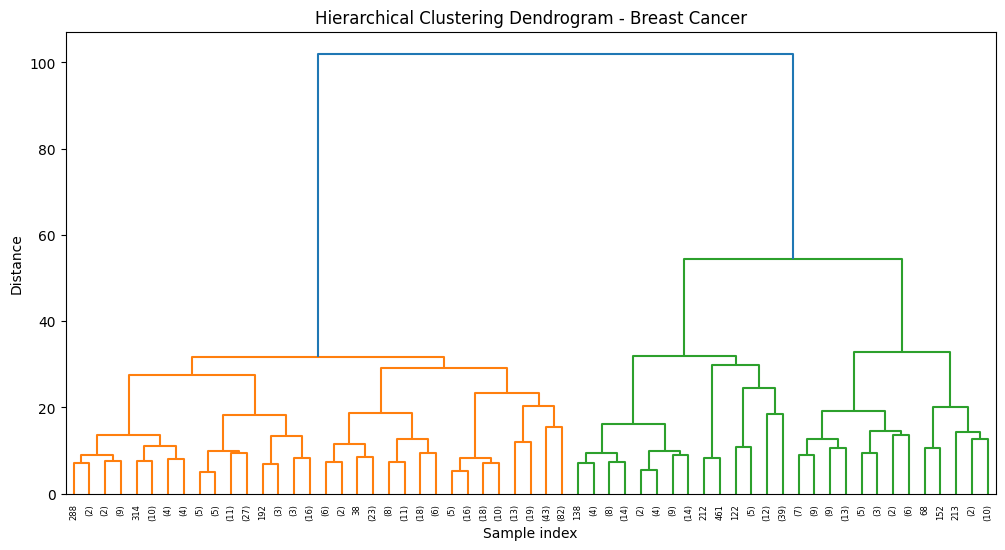

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

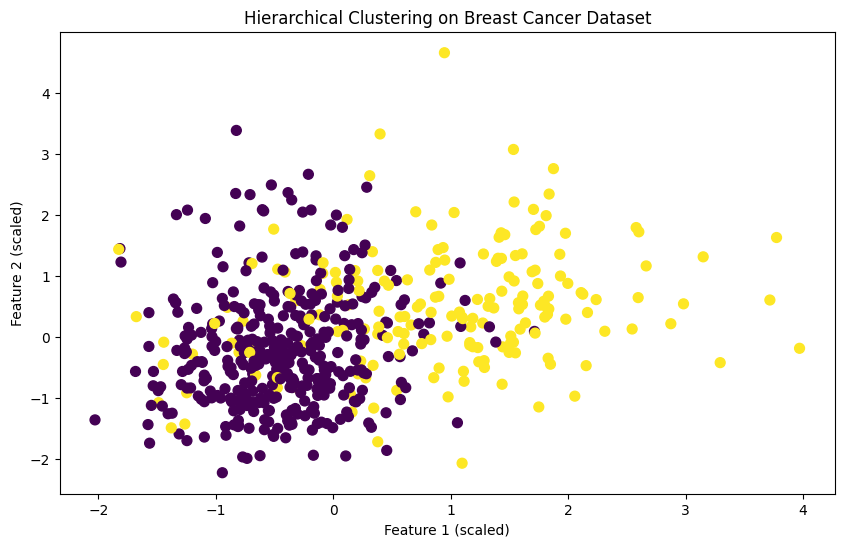

In [3]:
# Ÿàÿßÿ±ÿØ ⁄©ÿ±ÿØŸÜ ⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá‚ÄåŸáÿß
import pandas as pd  # ÿ®ÿ±ÿß€å ⁄©ÿßÿ± ÿ®ÿß ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ‚ÄåŸáÿß
import matplotlib.pyplot as plt  # ÿ®ÿ±ÿß€å ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß
from sklearn.datasets import load_breast_cancer  # ÿØ€åÿ™ÿßÿ≥ÿ™ ÿ≥ÿ±ÿ∑ÿßŸÜ Ÿæÿ≥ÿ™ÿßŸÜ
from sklearn.preprocessing import StandardScaler  # ÿ®ÿ±ÿß€å ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # ÿ®ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ≥ŸÑÿ≥ŸÑŸá‚ÄåŸÖÿ±ÿßÿ™ÿ®€å

# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØ€åÿ™ÿßÿ≥ÿ™
cancer = load_breast_cancer()  # ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØ€åÿ™ÿßÿ≥ÿ™
X = cancer.data  # ÿßŸÜÿ™ÿÆÿßÿ® Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
y_true = cancer.target  # ÿ®ÿ±⁄Üÿ≥ÿ® ŸàÿßŸÇÿπ€å ÿ®ÿ±ÿß€å ŸÖŸÇÿß€åÿ≥Ÿá (ÿßÿÆÿ™€åÿßÿ±€å)

# ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
scaler = StandardScaler()  # ÿß€åÿ¨ÿßÿØ ÿ¥€åÿ° ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ≥ÿßÿ≤
X_scaled = scaler.fit_transform(X)  # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿ™ŸÖÿßŸÖ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß

# ÿß€åÿ¨ÿßÿØ ŸÖÿßÿ™ÿ±€åÿ≥ ŸÑ€åŸÜ⁄© ÿ®ÿ±ÿß€å Hierarchical Clustering
Z = linkage(X_scaled, method='ward')  # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá linkage ÿ®ÿß ÿ±Ÿàÿ¥ Ward (⁄©ŸÖ€åŸÜŸá ⁄©ÿ±ÿØŸÜ Ÿàÿßÿ±€åÿßŸÜÿ≥ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß)

# ÿ±ÿ≥ŸÖ Dendrogram (ÿØÿ±ÿÆÿ™ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å)
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # ŸÜŸÖÿß€åÿ¥ ÿØÿ±ÿÆÿ™ ÿ™ÿß 5 ÿ≥ÿ∑ÿ≠ ÿ®ÿ±ÿß€å Ÿàÿ∂Ÿàÿ≠ ÿ®Ÿáÿ™ÿ±
plt.title("Hierarchical Clustering Dendrogram - Breast Cancer")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# ÿ™ÿπ€å€åŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿß ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá ÿØŸÑÿÆŸàÿßŸá
n_clusters = 2  # ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß (ŸÖÿ´ŸÑÿßŸã 2 ÿ®ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿÆŸàÿ¥‚ÄåÿÆ€åŸÖ/ÿ®ÿØÿÆ€åŸÖ)
labels = fcluster(Z, n_clusters, criterion='maxclust')  # ÿ™ÿπ€å€åŸÜ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ
df = pd.DataFrame(X_scaled, columns=cancer.feature_names)  # ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿ®ÿß Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
df['Cluster'] = labels  # ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ≥ÿ™ŸàŸÜ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
print(df.head())  # ŸÜŸÖÿß€åÿ¥ 5 ÿ±ÿØ€åŸÅ ÿßŸàŸÑ ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ

# ÿ±ÿ≥ŸÖ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ±Ÿà€å ÿØŸà Ÿà€å⁄ò⁄Ø€å ÿßŸàŸÑ ÿ®ÿ±ÿß€å ÿ®ÿµÿ±€å‚Äåÿ≥ÿßÿ≤€å
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel("Feature 1 (scaled)")  # ŸÖÿ≠Ÿàÿ± x
plt.ylabel("Feature 2 (scaled)")  # ŸÖÿ≠Ÿàÿ± y
plt.title("Hierarchical Clustering on Breast Cancer Dataset")
plt.show()


<div dir="rtl" align="right">

üìå ÿ™Ÿàÿ∂€åÿ≠ ÿÆÿ∑ ÿ®Ÿá ÿÆÿ∑

StandardScaler ‚Üí ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿß€åŸÜ⁄©Ÿá ŸáŸÖŸá Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß €å⁄© Ÿàÿßÿ≠ÿØ ÿßŸÜÿØÿßÿ≤Ÿá‚Äå⁄Ø€åÿ±€å ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ŸÜÿØ.

linkage ‚Üí ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿßÿ™ÿ±€åÿ≥ ŸÅÿßÿµŸÑŸá Ÿà ÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®€åŸÜ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß. ÿ±Ÿàÿ¥ ward ÿ≥ÿπ€å ŸÖ€å‚Äå⁄©ŸÜÿØ Ÿàÿßÿ±€åÿßŸÜÿ≥ ÿØÿßÿÆŸÑ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ⁄©ŸÖ€åŸÜŸá ÿ¥ŸàÿØ.

dendrogram ‚Üí ÿ±ÿ≥ŸÖ ÿØÿ±ÿÆÿ™ ÿ≥ŸÑÿ≥ŸÑŸá‚ÄåŸÖÿ±ÿßÿ™ÿ®€å ⁄©Ÿá ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß ⁄Üÿ∑Ÿàÿ± ÿ®Ÿá ŸáŸÖ ŸÖÿ™ÿµŸÑ ŸÖ€å‚Äåÿ¥ŸàŸÜÿØ.

fcluster ‚Üí ÿ™ÿπ€å€åŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿßÿ≤ ÿ±Ÿà€å ÿØÿ±ÿÆÿ™ ÿ®ÿß ŸÖÿπ€åÿßÿ± ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá ÿØŸÑÿÆŸàÿßŸá (maxclust).

ÿ±ÿ≥ŸÖ ŸÜŸÇÿßÿ∑ ‚Üí ÿ®ÿ±ÿß€å ŸÖÿ¥ÿßŸáÿØŸá ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ±Ÿà€å ÿØŸà ÿ®ÿπÿØ ÿßŸàŸÑ (Feature 1 Ÿà Feature 2).